# Processamento para a SPTrans

* Elaboração de polínogos dos leitos carroçados
* Levantamento de largura dos leitos carroçados
* Determinação das declividades de cada feição


In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

In [2]:
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

plt.rcParams['figure.figsize'] = (40, 30)

In [3]:
df_qf_s = gpd.read_file(f'gis/SIRGAS_SHP_quadraMDSF.shp')
df_qv_s = gpd.read_file(f'gis/SIRGAS_SHP_quadraviariaed_polygon.shp')
df_l_s = gpd.read_file(f'gis/SIRGAS_SHP_logradouronbl.shp')
df_s_s = gpd.read_file(f'gis/SIRGAS_SHP_distrito_polygon.shp')
df_represas = gpd.read_file(f'gis/SIRGAS_REPRESAS_NIVELMAX.shp')
df_massa_dagua = gpd.read_file(f'gis/SIRGAS_MASSADAGUA.shp')

In [18]:
df_s = df_s_s[df_s_s.ds_nome == 'SE']

In [19]:
df_s_sindex = df_s.sindex
df_l_sindex = df_l_s.sindex

In [20]:
bounds = list(df_s.bounds.values[0])

In [21]:
# Removendo área de represa
df_s = gpd.overlay(df_s, df_represas, how='difference')

In [22]:
# Removendoo Massa dagua
df_s = gpd.overlay(df_s, df_massa_dagua, how='difference')

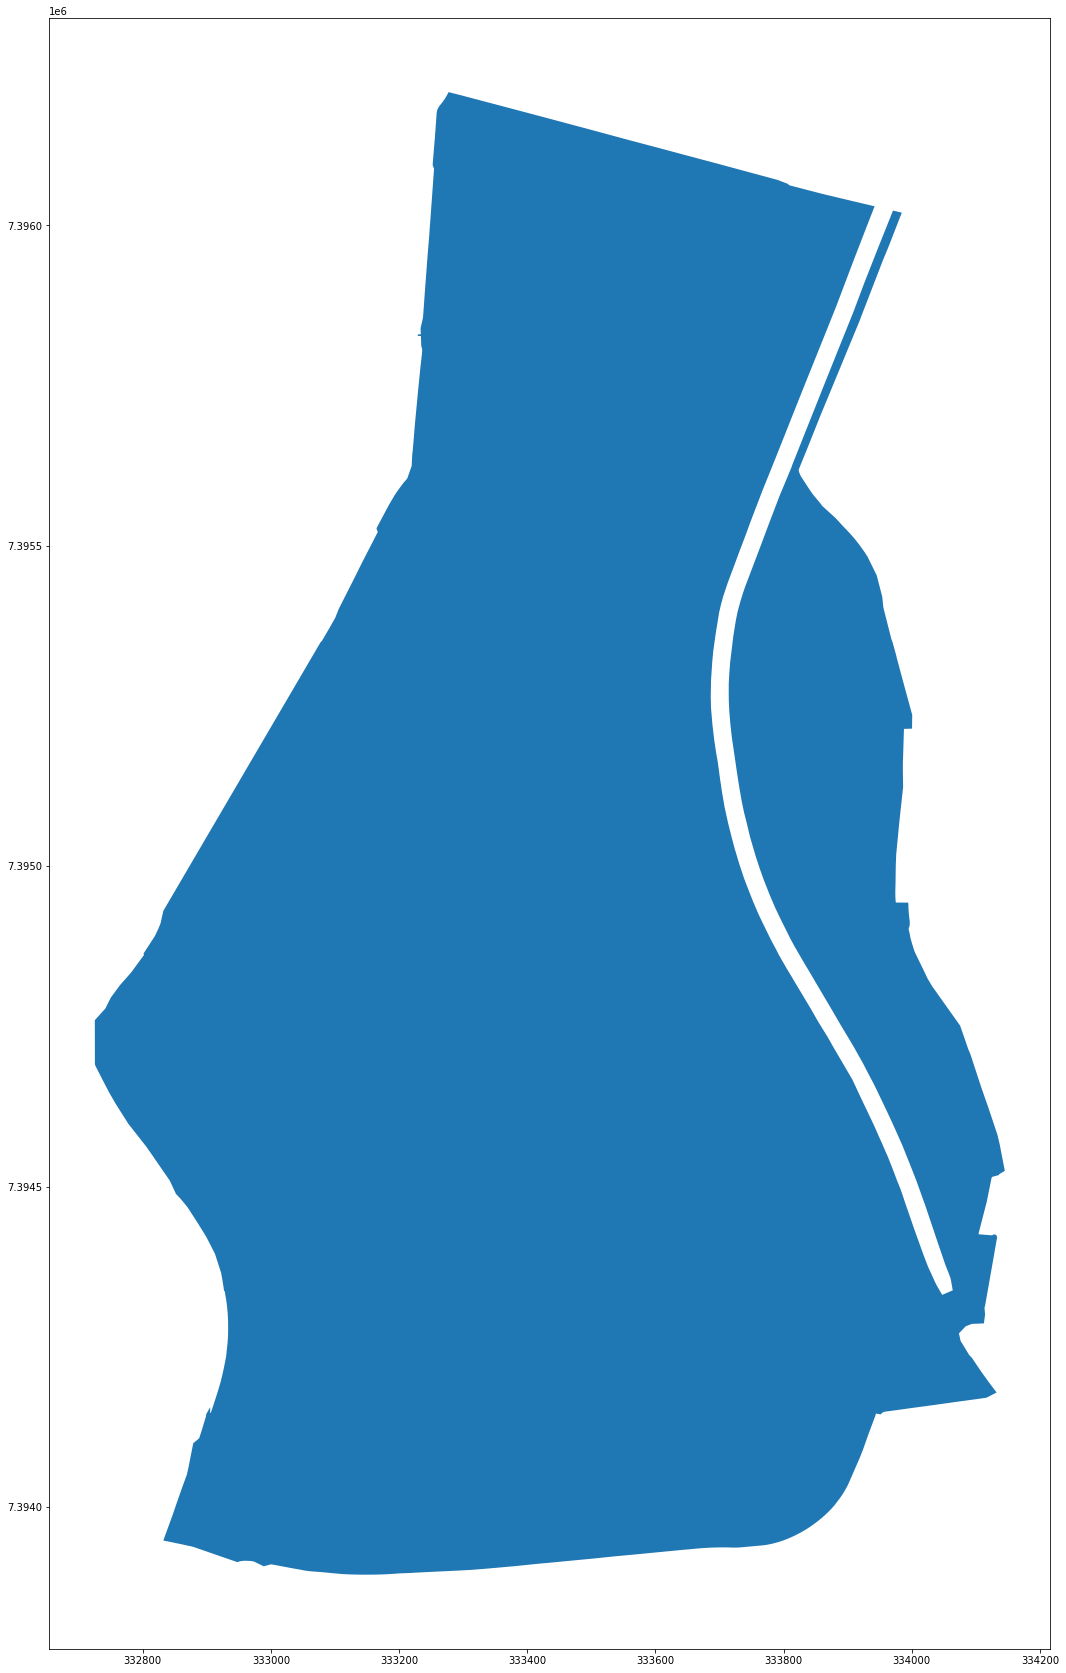

In [28]:
df_s.plot()

In [23]:
# Get the indices of the Points that are likely to be inside the bounding box of the given Polygon
l_candidate_idx = list(df_l_sindex.intersection(bounds))
l_candidates = df_l_s.loc[l_candidate_idx]

In [24]:
df_qv_sindex = df_qv_s.sindex

In [25]:
# Get the bounding box coordinates of the Polygon as a list
bounds = list(df_s.bounds.values[0])

In [26]:
# Get the indices of the Points that are likely to be inside the bounding box of the given Polygon
qv_candidate_idx = list(df_qv_sindex.intersection(bounds))
qv_candidates = df_qv_s.loc[qv_candidate_idx]

In [36]:
df_vias = gpd.overlay(df_s, qv_candidates, how='difference')

In [38]:
print(df_vias.area)

13    457194.596424
dtype: float64


In [39]:
df_qf_sindex = df_qf_s.sindex

In [40]:
# Get the indices of the Points that are likely to be inside the bounding box of the given Polygon
qf_candidate_idx = list(df_qf_sindex.intersection(bounds))
qf_candidates = df_qf_s.loc[qf_candidate_idx]

In [41]:
df_vias = gpd.overlay(df_vias, df_qf_s, how='difference')

In [42]:
print(df_vias.area)

13    448595.655547
dtype: float64
